# Matplotlib Review

## General Matplotlib Tips

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


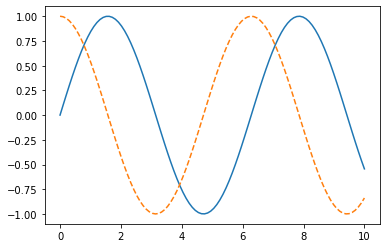

In [2]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [0]:
fig.savefig('someimage.jpg')

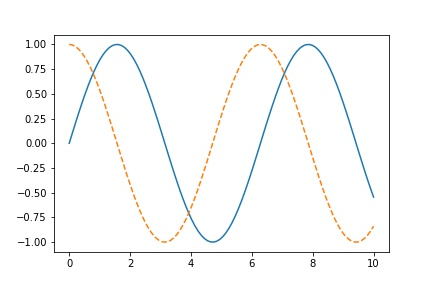

In [4]:
from IPython.display import Image
Image('someimage.jpg')

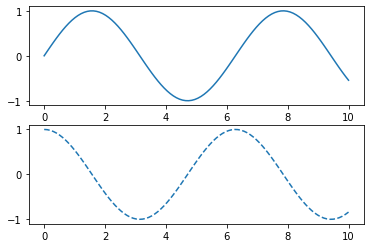

In [5]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x), '-')

plt.subplot(2, 1, 2)
plt.plot(x, np. cos(x), '--');

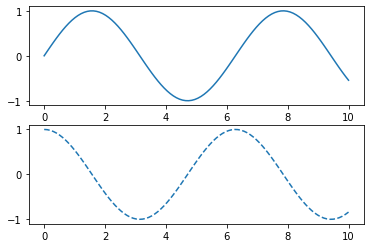

In [6]:
fig, axes = plt.subplots(2)

axes[0].plot(x, np.sin(x), '-')
axes[1].plot(x, np.cos(x), '--');

## Simple Line Plots

In [0]:
plt.style.use('seaborn-whitegrid')

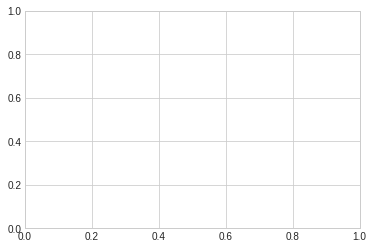

In [8]:
fig = plt.figure()
ax = plt.axes()

### Adjusting the Plot : Line Colors and Styles

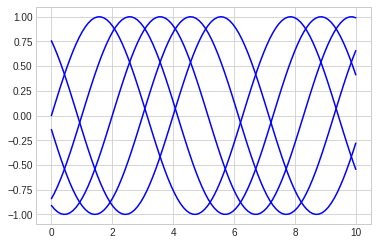

In [9]:
for i in range(5):
    plt.plot(x, np.sin(x - i), color='blue')

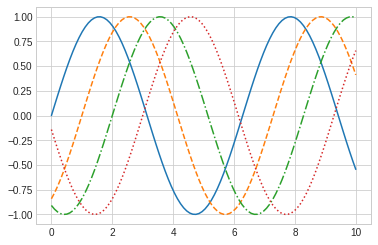

In [10]:
for (i, style) in enumerate(['solid', 'dashed', 'dashdot', 'dotted']):
    plt.plot(x, np.sin(x - i), linestyle=style)

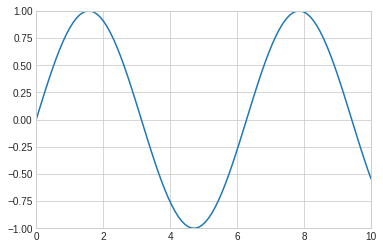

In [11]:
plt.plot(x, np.sin(x))
plt.xlim(0, 10)
plt.ylim(-1, 1);

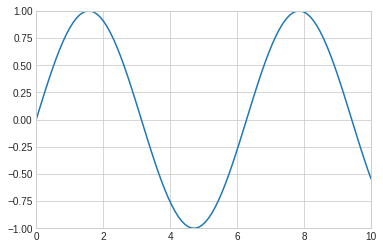

In [12]:
plt.plot(x, np.sin(x))
plt.axis([0, 10, -1, 1]);

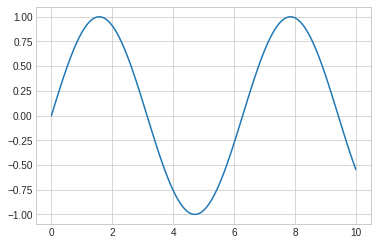

In [13]:
plt.plot(x, np.sin(x))
plt.axis('tight');

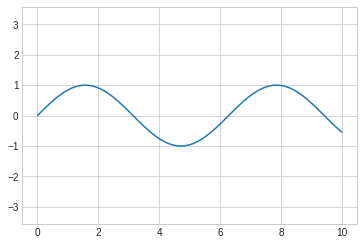

In [14]:
plt.plot(x, np.sin(x))
plt.axis('equal');

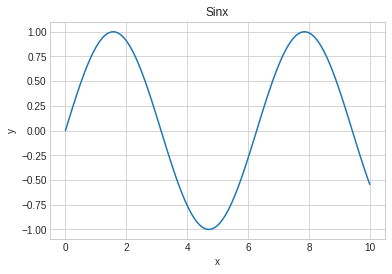

In [15]:
plt.plot(x, np.sin(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sinx');

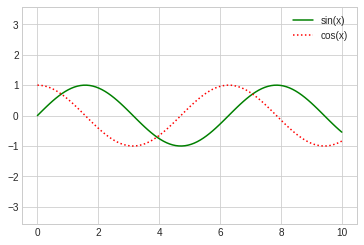

In [17]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':r', label='cos(x)')
plt.axis('equal')
plt.legend();

---

## Simple Scatter Plots

In [0]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

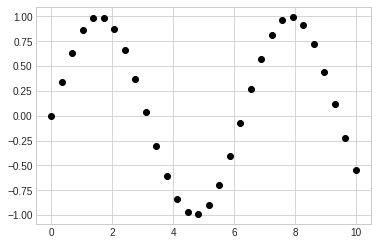

In [22]:
plt.plot(x, y, 'o', color='black');

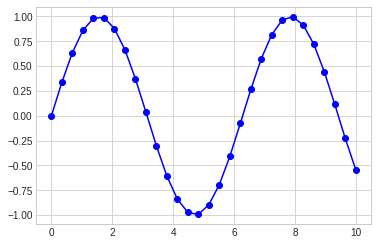

In [21]:
plt.plot(x, y, 'b-o');

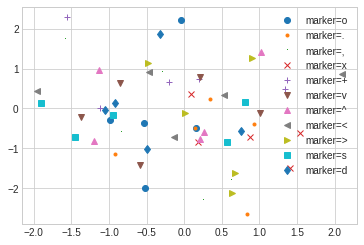

In [25]:
markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
for marker in markers:
    plt.plot(np.random.randn(5), np.random.randn(5), marker, label='marker={}'.format(marker))
plt.legend();

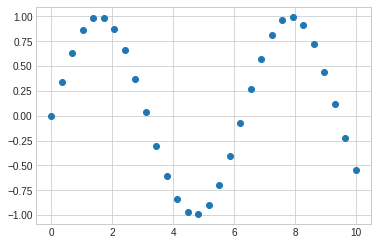

In [24]:
plt.scatter(x, y, marker='o');

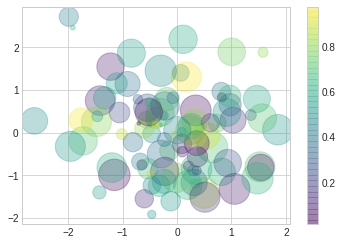

In [28]:
rng = np.random.RandomState(42)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

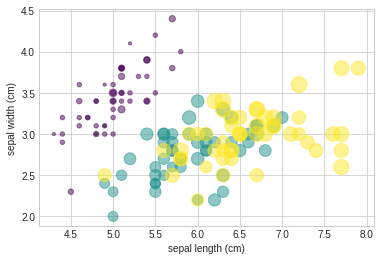

In [34]:
plt.scatter(features[0], features[1], alpha=0.5, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

---

## Visualizing Errors

### Basic Errorbars

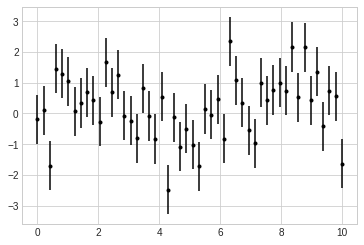

In [35]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

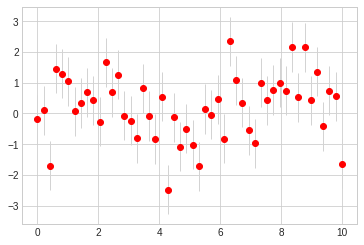

In [36]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='red', ecolor='lightgray', elinewidth=1, capsize=0);

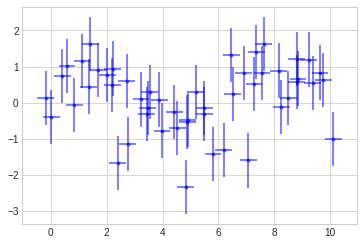

In [38]:
dx = 0.3
x = np.linspace(0, 10, 50) + dx * np.random.randn(50)
dy = 0.75
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='.b', elinewidth=2, alpha=0.5);


In [0]:
from sklearn.gaussian_process import GaussianProcessRegressor

model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

In [41]:
gp = GaussianProcessRegressor()
gp.fit(xdata.reshape(-1, 1), ydata)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [0]:
xfit = np.linspace(0, 100, 1000)
yfit, std = gp.predict(xfit.reshape(-1, 1), return_std=True)
dyfit = 2 * std

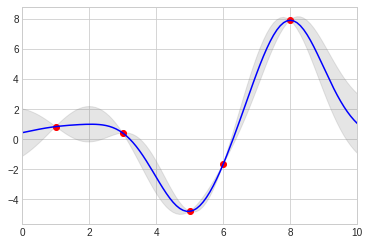

In [44]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, color='b')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlim(0, 10);

---

## Density and Contour Plots

In [0]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [0]:
x = np.array([1, 2, 3, 4])
y = np.array([3, 4, 5, 6])

X, Y = np.meshgrid(x, y)

In [50]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [51]:
Y

array([[3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [0]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The following kwargs were not used by contour: 'color'
  """Entry point for launching an IPython kernel.


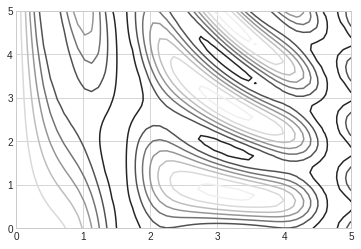

In [53]:
plt.contour(X, Y, Z, color='k');

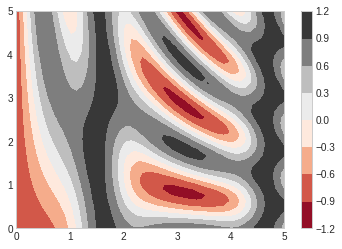

In [54]:
plt.contourf(X, Y, Z, cmap='RdGy')
plt.colorbar();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


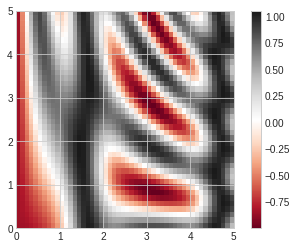

In [55]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

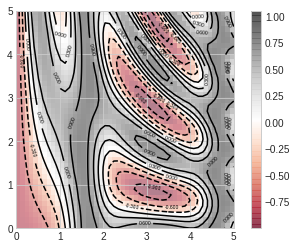

In [56]:
contours = plt.contour(X, Y, Z, colors='black')
plt.clabel(contours, inline=True, fontsize=5)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5)
plt.colorbar();

In [0]:
data = np.random.normal(0, 1, size=1000)

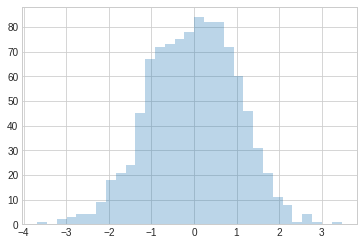

In [62]:
plt.hist(data, histtype='stepfilled', alpha=0.3, bins=int(np.sqrt(1000)));

In [63]:
np.histogram(data, bins=5)

(array([ 19, 204, 493, 268,  16]),
 array([-3.68181989, -2.25251549, -0.82321109,  0.6060933 ,  2.0353977 ,
         3.46470209]))

In [0]:
mean = [0, 0]
cov = [[1, 0.2], [0.2, 1]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

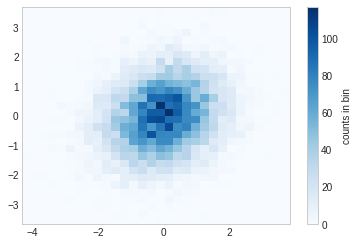

In [69]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin');